In [1]:
'''import csv

with open(r"N:\SEMESTER 5\TSA 19cse355\bio data\PIOMAS.thick.daily.1979.2022.Current.v2.1.dat\PIOMAS.thick.daily.1979.2022.Current.v2.1.csv") as dat_file:
    with open('Thickness.csv', 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        for row in dat_file:
            row = [value.strip() for value in row.split('|')]
            csv_writer.writerow(row)
'''

'import csv\n\nwith open(r"N:\\SEMESTER 5\\TSA 19cse355\x08io data\\PIOMAS.thick.daily.1979.2022.Current.v2.1.dat\\PIOMAS.thick.daily.1979.2022.Current.v2.1.csv") as dat_file:\n    with open(\'Thickness.csv\', \'w\', newline=\'\') as csv_file:\n        csv_writer = csv.writer(csv_file)\n        for row in dat_file:\n            row = [value.strip() for value in row.split(\'|\')]\n            csv_writer.writerow(row)\n'

In [2]:
import pandas as pd

In [3]:
d=pd.read_csv("Thickness.csv")

In [4]:
d

,Year,day,Thickness
0,1979,1,1.951
1,1979,2,1.955
2,1979,3,1.962
3,1979,4,1.965
4,1979,5,1.973
...,...,...,...
16024,2022,330,1.134
16025,2022,331,1.142
16026,2022,332,1.151
16027,2022,333,1.159


In [43]:
df=pd.DataFrame(d)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import  numpy as np
from numpy import log
from scipy.stats import boxcox

In [6]:
d1=pd.DataFrame(d.loc[(d['Year'] >= 1979) & (d['Year'] <= 2000)])

In [7]:
d1

,Year,day,Thickness
0,1979,1,1.951
1,1979,2,1.955
2,1979,3,1.962
3,1979,4,1.965
4,1979,5,1.973
...,...,...,...
8025,2000,361,1.559
8026,2000,362,1.563
8027,2000,363,1.565
8028,2000,364,1.567


<AxesSubplot:xlabel='day', ylabel='Thickness'>

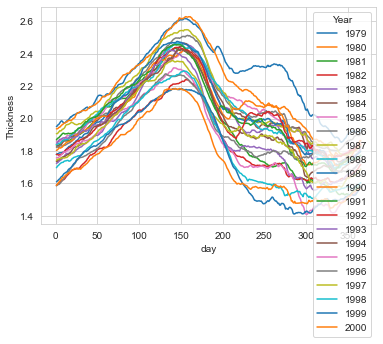

In [8]:
sns.lineplot(data=d1,x='day',y='Thickness',hue='Year',palette='tab10')

In [9]:
d2=pd.DataFrame(d.loc[(d['Year'] > 2000) & (d['Year'] <= 2022)])
d2

,Year,day,Thickness
8030,2001,1,1.572
8031,2001,2,1.581
8032,2001,3,1.584
8033,2001,4,1.591
8034,2001,5,1.596
...,...,...,...
16024,2022,330,1.134
16025,2022,331,1.142
16026,2022,332,1.151
16027,2022,333,1.159


<AxesSubplot:xlabel='day', ylabel='Thickness'>

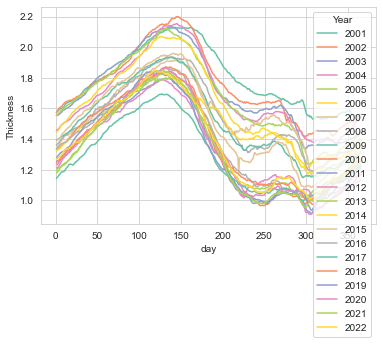

In [10]:
sns.lineplot(data=d2,x='day',y='Thickness',hue='Year',palette='Set2')

<AxesSubplot:xlabel='day', ylabel='Thickness'>

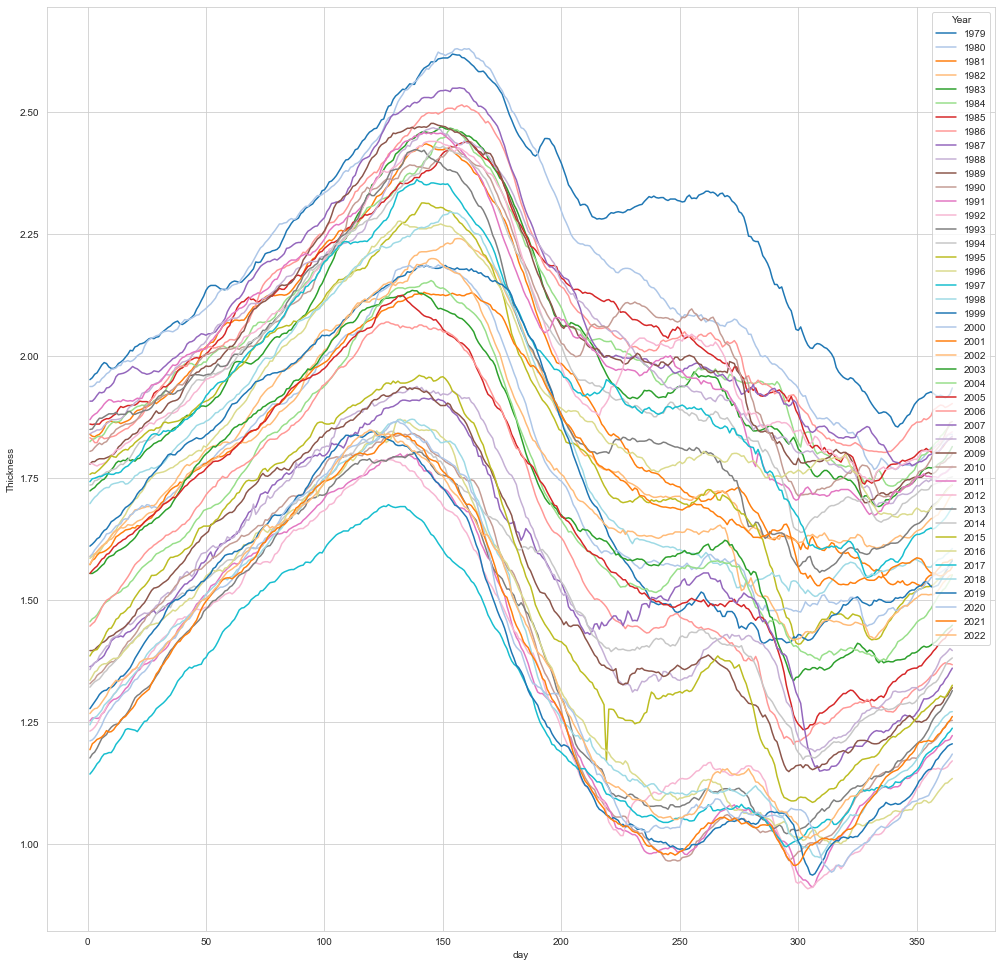

In [11]:
plt.figure(figsize=(17,17))
sns.lineplot(data=d,x='day',y='Thickness',hue='Year',palette='tab20')

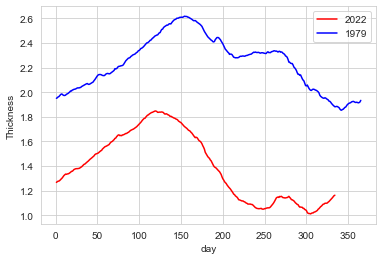

In [12]:
g=sns.lineplot(data=d[d['Year']==2022],x='day',y='Thickness',color='r',label='2022')
g=sns.lineplot(data=d[d['Year']==1979],x='day',y='Thickness',color='b',label='1979')
g.legend()

(100.0, 200.0)

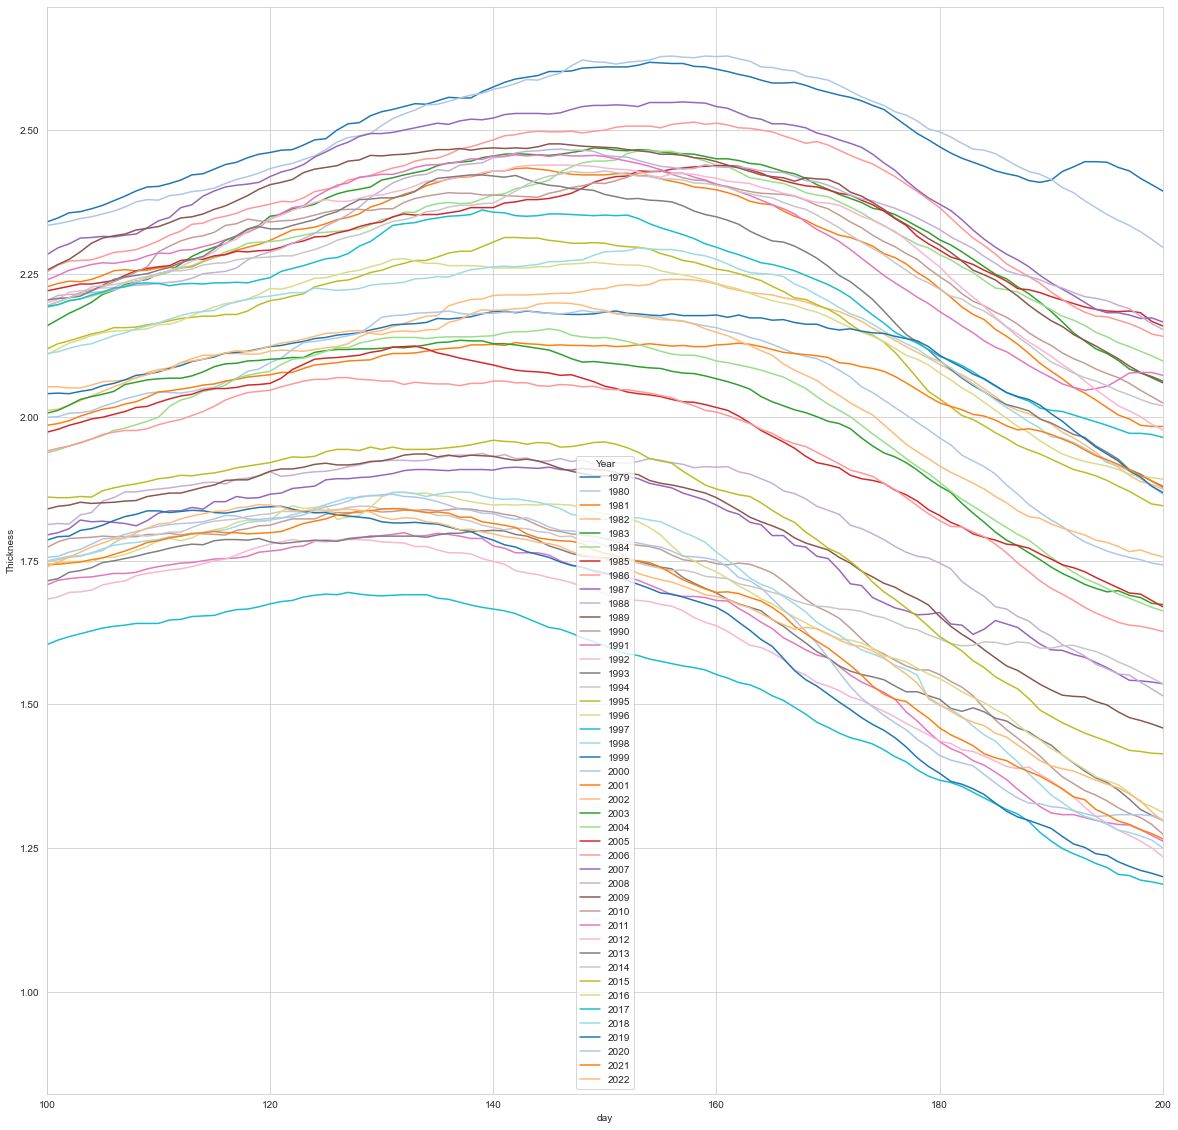

In [13]:
plt.figure(figsize=(20, 20))
g=sns.lineplot(data=d, x='day', y='Thickness', hue='Year', palette='tab20')
g.set_xlim(100,200)

(200.0, 350.0)

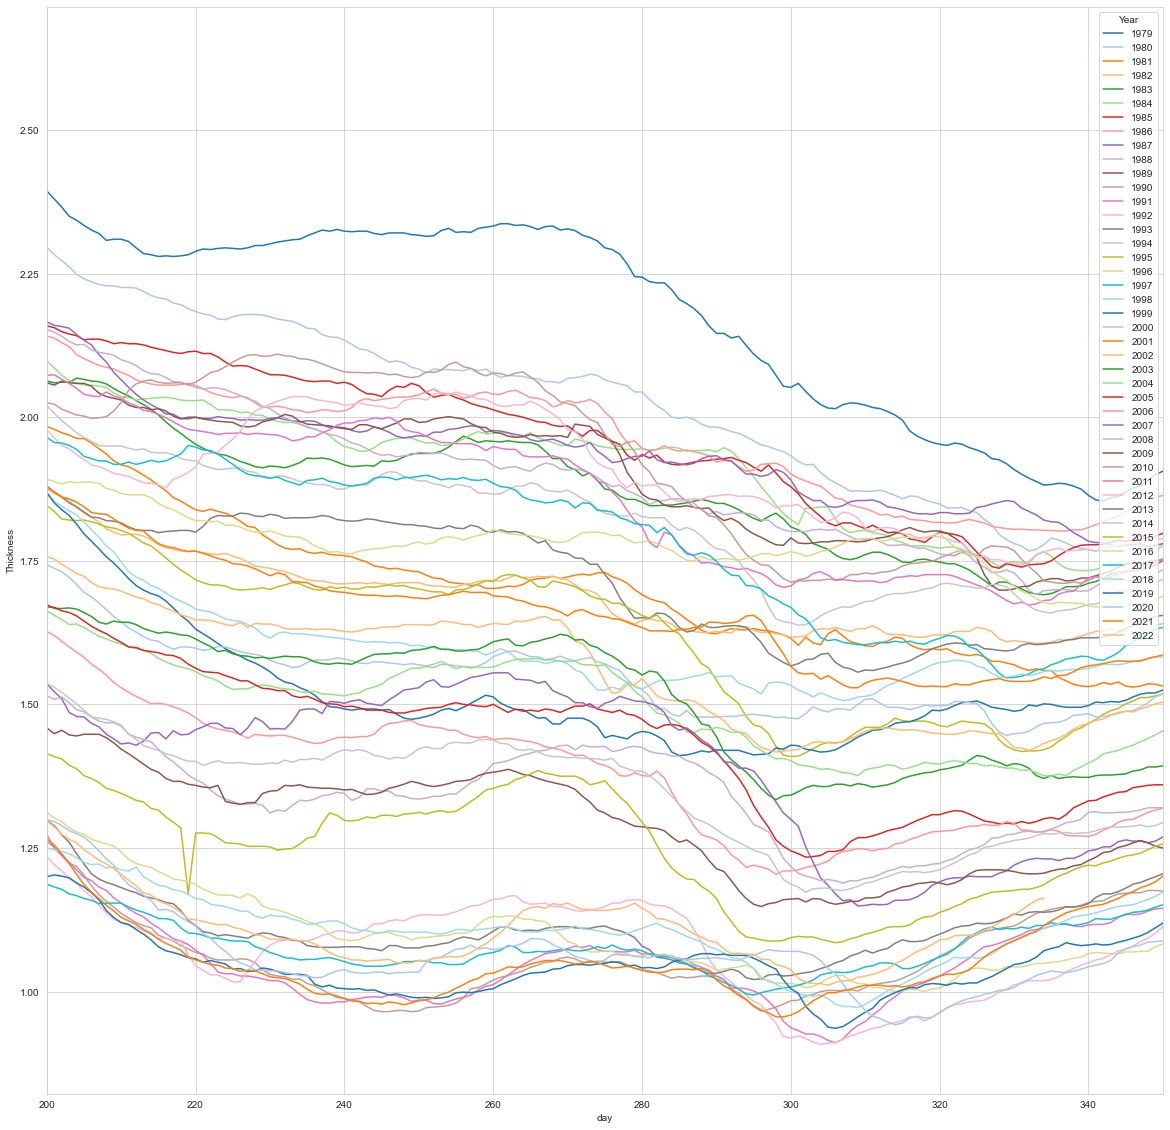

In [14]:
plt.figure(figsize=(20, 20))
g=sns.lineplot(data=d, x='day', y='Thickness', hue='Year', palette='tab20')
g.set_xlim(200,350)

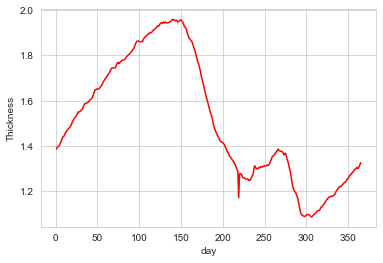

In [15]:
g=sns.lineplot(data=d[d['Year']==2015],x='day',y='Thickness',color='r',label='')

In [16]:
yrLst = list(d['Year'].unique())
# yrLst

In [17]:
emp = pd.DataFrame()
emp1 = pd.DataFrame()
emp2=pd.DataFrame()
emp3=pd.DataFrame()
emptylst = []

In [18]:
d.shape

(16029, 3)

In [19]:
# df=pd.DataFrame(d[d['Year']==2000])

In [20]:
# df['pandas_SMA_3'] = df.iloc[:,1].rolling(window=45).mean()
# df

In [21]:
for i in yrLst:
    emp = pd.concat([emp,d[d['Year'] == i]])
    emp['SMA_45'] = emp.loc[:,'Thickness'].rolling(window=45).mean()
emp.replace(np.NAN,0,inplace=True)
emp

,Year,day,Thickness,SMA_45
0,1979,1,1.951,0.000000
1,1979,2,1.955,0.000000
2,1979,3,1.962,0.000000
3,1979,4,1.965,0.000000
4,1979,5,1.973,0.000000
...,...,...,...,...
16024,2022,330,1.134,1.064622
16025,2022,331,1.142,1.065378
16026,2022,332,1.151,1.066511
16027,2022,333,1.159,1.067933


<AxesSubplot:xlabel='day', ylabel='Thickness'>

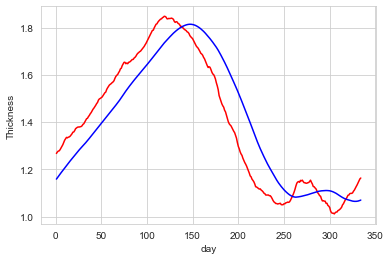

In [22]:
sns.lineplot(data=d[d['Year']==2022],x='day',y='Thickness',color='r')
sns.lineplot(data=emp[emp['Year']==2022],x='day',y='SMA_45',color='b')

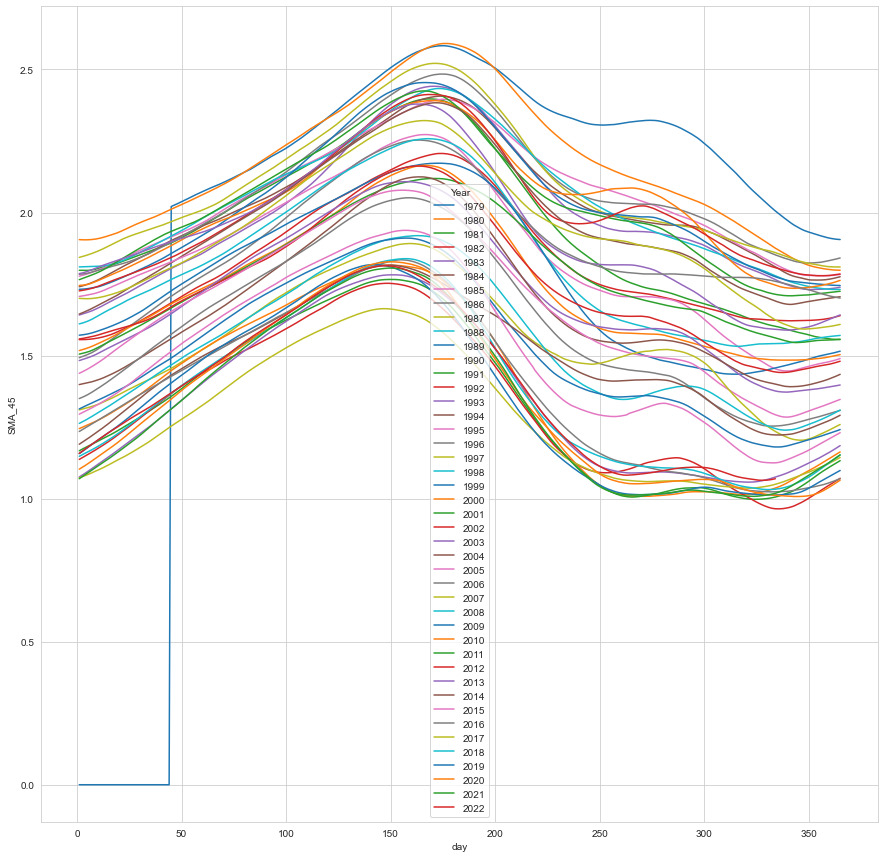

In [23]:
plt.figure(figsize=(15,15))
sns.lineplot(data=emp,x='day',y='SMA_45',hue='Year',palette='tab10')
plt.show()

In [24]:
for j in yrLst:
    emp1 = pd.concat([emp1,d[d['Year'] == j]])
    emp1['SMA_60'] = emp1.loc[:,'Thickness'].rolling(window=60).mean()
emp1.replace(np.NAN,0,inplace=True)
emp1

,Year,day,Thickness,SMA_60
0,1979,1,1.951,0.000000
1,1979,2,1.955,0.000000
2,1979,3,1.962,0.000000
3,1979,4,1.965,0.000000
4,1979,5,1.973,0.000000
...,...,...,...,...
16024,2022,330,1.134,1.083117
16025,2022,331,1.142,1.083017
16026,2022,332,1.151,1.083150
16027,2022,333,1.159,1.083417


<AxesSubplot:xlabel='day', ylabel='Thickness'>

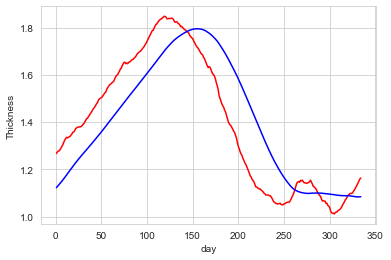

In [25]:
sns.lineplot(data=d[d['Year']==2022],x='day',y='Thickness',color='r')
sns.lineplot(data=emp1[emp1['Year']==2022],x='day',y='SMA_60',color='b')

In [26]:
emp1

,Year,day,Thickness,SMA_60
0,1979,1,1.951,0.000000
1,1979,2,1.955,0.000000
2,1979,3,1.962,0.000000
3,1979,4,1.965,0.000000
4,1979,5,1.973,0.000000
...,...,...,...,...
16024,2022,330,1.134,1.083117
16025,2022,331,1.142,1.083017
16026,2022,332,1.151,1.083150
16027,2022,333,1.159,1.083417


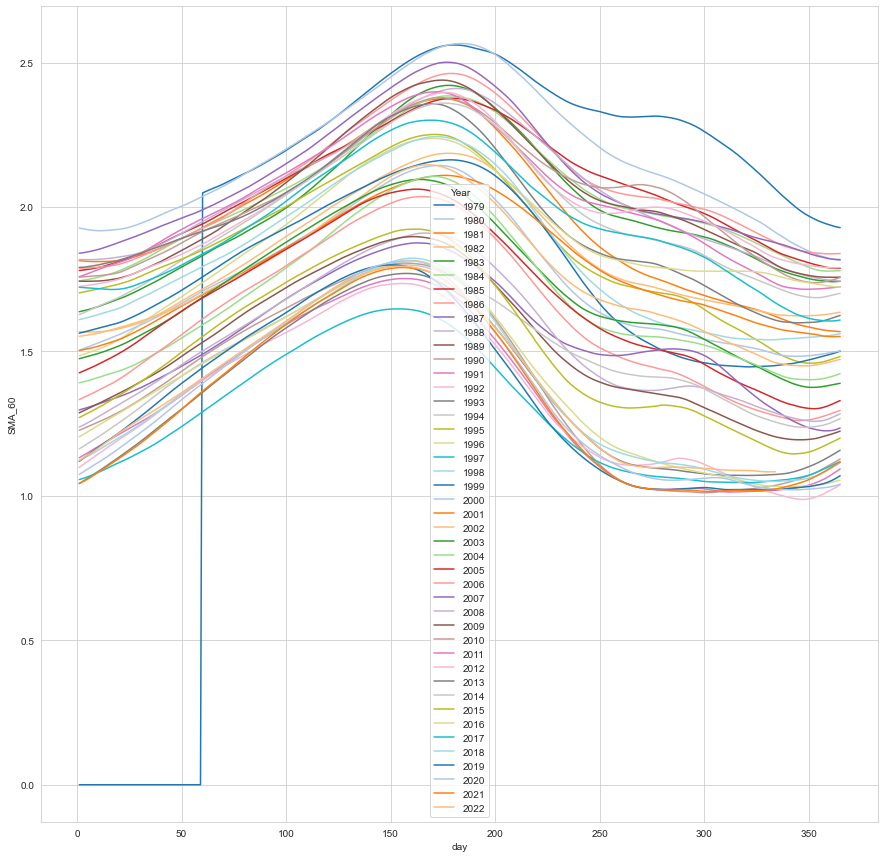

In [27]:
plt.figure(figsize=(15,15))
sns.lineplot(data=emp1,x='day',y='SMA_60',hue='Year',palette='tab20')
plt.show()

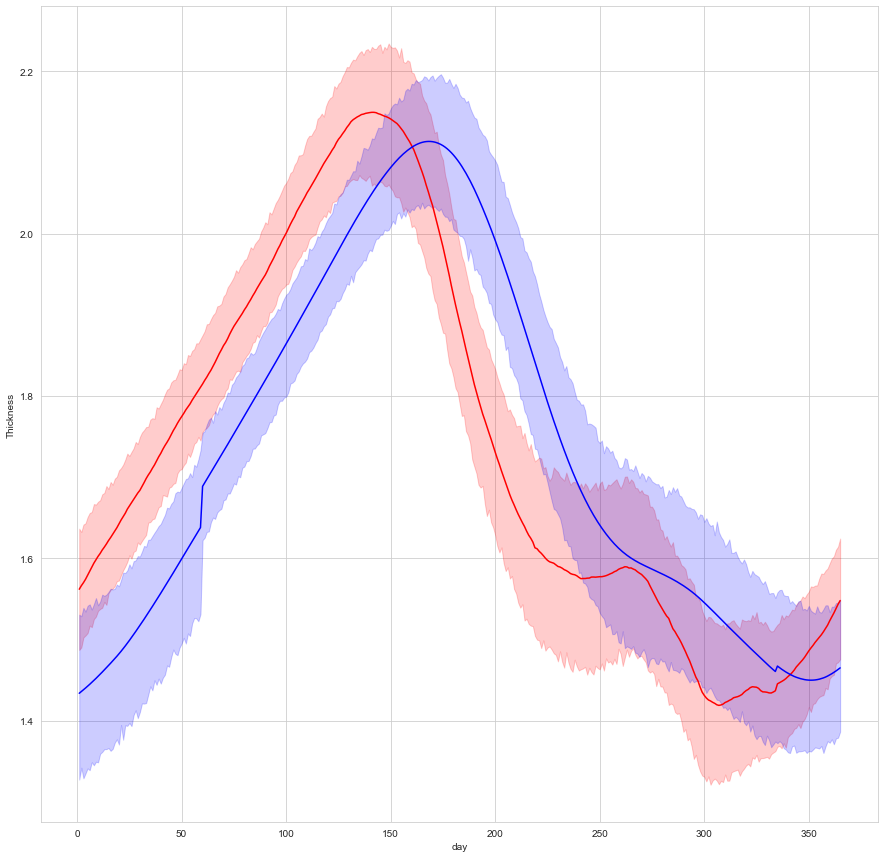

In [28]:
plt.figure(figsize=(15,15))
sns.lineplot(data=d,x='day',y='Thickness',color='r')
sns.lineplot(data=emp1,x='day',y='SMA_60',color='b')
plt.show()

In [29]:
for i in yrLst:
    emp2 = pd.concat([emp2,d[d['Year'] == i]])
    emp2['SMA_120'] = emp2.loc[:,'Thickness'].rolling(window=120).mean()
emp2.replace(np.NAN,0,inplace=True)
emp2

,Year,day,Thickness,SMA_120
0,1979,1,1.951,0.000000
1,1979,2,1.955,0.000000
2,1979,3,1.962,0.000000
3,1979,4,1.965,0.000000
4,1979,5,1.973,0.000000
...,...,...,...,...
16024,2022,330,1.134,1.091892
16025,2022,331,1.142,1.091458
16026,2022,332,1.151,1.091183
16027,2022,333,1.159,1.091075


<AxesSubplot:xlabel='day', ylabel='Thickness'>

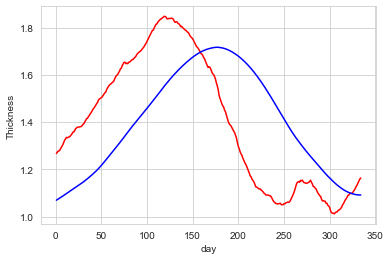

In [30]:
sns.lineplot(data=d[d['Year']==2022],x='day',y='Thickness',color='r')
sns.lineplot(data=emp2[emp2['Year']==2022],x='day',y='SMA_120',color='b')

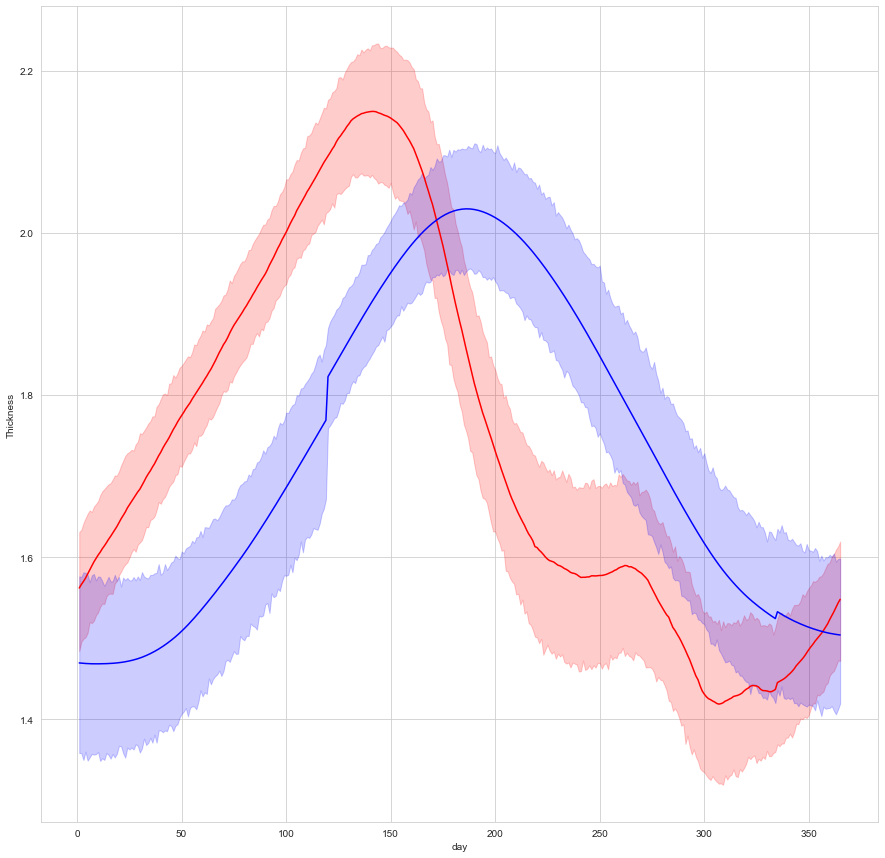

In [31]:
plt.figure(figsize=(15,15))
sns.lineplot(data=d,x='day',y='Thickness',color='r')
sns.lineplot(data=emp2,x='day',y='SMA_120',color='b')
plt.show()

In [37]:
# for k in yrLst:
#     emp3 = pd.concat([emp3,d[d['Year'] == k]])
#     emp3['Average'] = emp3.loc[:,'Thickness'].mean()
# emp3

,Year,day,Thickness,Average
0,1979,1,1.951,1.735833
1,1979,2,1.955,1.735833
2,1979,3,1.962,1.735833
3,1979,4,1.965,1.735833
4,1979,5,1.973,1.735833
...,...,...,...,...
16024,2022,330,1.134,1.735833
16025,2022,331,1.142,1.735833
16026,2022,332,1.151,1.735833
16027,2022,333,1.159,1.735833


In [40]:
# x=pd.DataFrame(emp2['SMA_120'].unique())

In [41]:
yrLst

[1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [46]:
# frame=pd.DataFrame()

In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller

In [68]:
e=pd.DataFrame(emp2[emp2.set_index==emp2['Year']])
e.set_index=e['Year']
e

,Year,day,Thickness,SMA_120
0,1979,1,1.951,0.000000
1,1979,2,1.955,0.000000
2,1979,3,1.962,0.000000
3,1979,4,1.965,0.000000
4,1979,5,1.973,0.000000
...,...,...,...,...
16024,2022,330,1.134,1.091892
16025,2022,331,1.142,1.091458
16026,2022,332,1.151,1.091183
16027,2022,333,1.159,1.091075


In [69]:
import pmdarima as pm

In [70]:
model_arima= pm.auto_arima(emp2.SMA_120,trace=True, error_action='ignore', test='adf',start_p=1,start_q=1,max_p=5,max_q=5,d=None,suppress_warnings=True,stepwise=False,seasonal=False)
print(model_arima.summary())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=63688.075, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=2.27 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=21426.353, Time=2.27 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=4394.008, Time=3.45 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=-9255.814, Time=3.54 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=-12861.279, Time=2.36 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.40 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-84243.321, Time=0.71 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-84262.514, Time=1.94 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-84279.226, Time=1.67 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-84293.897, Time=2.82 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.61 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-84455.889, Time=1.64 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=8.36 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-83728.756, Time=12.59 sec
 ARIMA(3,0,0

In [71]:
model = pm.auto_arima(emp2.SMA_120, start_p=1, start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=1, # frequency of series
                      d=None, # let model determine 'd'
                      seasonal=False, # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-84243.321, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=63688.075, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=2.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-84455.889, Time=2.63 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.69 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-84253.359, Time=3.31 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=8.36 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-84262.514, Time=1.75 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=1.35 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-84471.718, Time=2.97 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-84462.374, Time=3.57 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-84236.691, Time=14.01 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-83728.756, Time=12.50 sec
 ARIMA(4,0,1)(0,0,0)[0]             : A

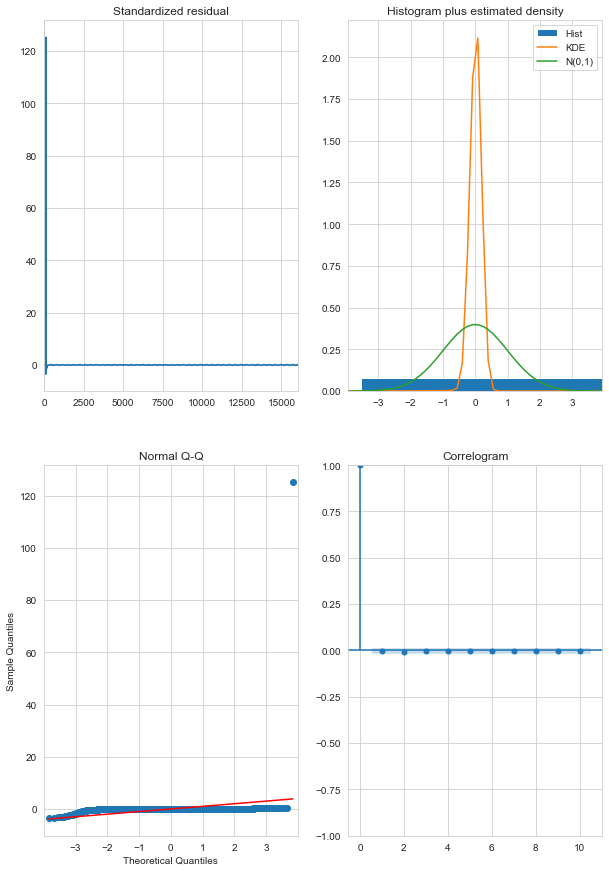

In [72]:
model.plot_diagnostics(figsize=(10,15))
plt.show()

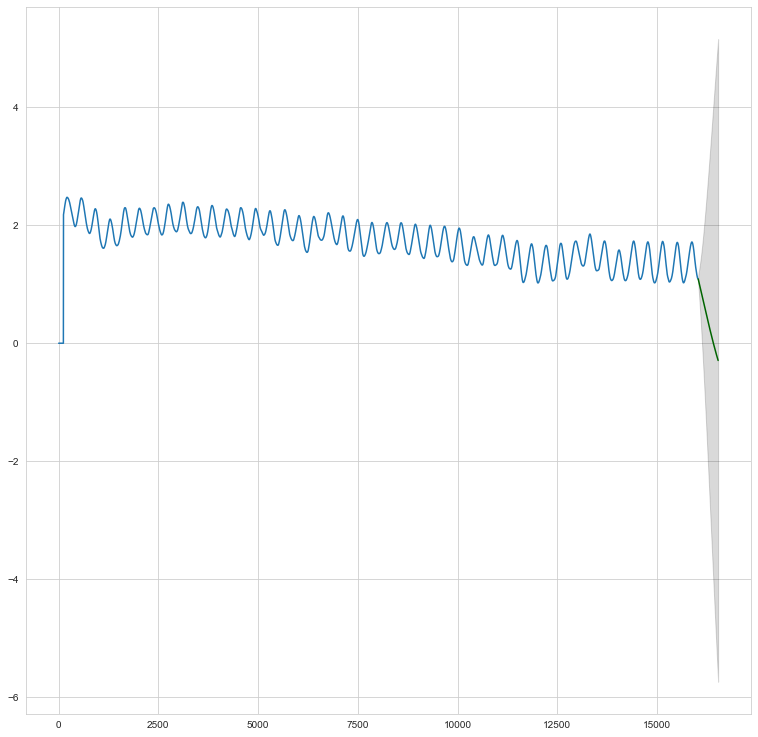

In [79]:
n_periods = 500
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(emp2.SMA_120), len(emp2.SMA_120)+n_periods)
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(emp2.SMA_120), len(emp2.SMA_120)+n_periods)
# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)
# Plot
plt.figure(figsize=(13,13))
plt.plot(emp2.SMA_120)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)
plt.show()